In [74]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [75]:
# read excel with techniques and probabilities
excel_file_X = pd.read_excel(r"C:\Users\Jurek\Documents\Uni\Teamprojekt\attack-hypotheses-generation\reduced_table_with_timestamps_and_props.xlsx", sheet_name="X")
excel_file_X = excel_file_X.set_index(["ID"])
probs = pd.DataFrame(excel_file_X.iloc[0])
probs.iloc[0]
probs = probs.iloc[1:]
probs

,prop
T1548.002,0.00493189
T1548.001,0.000469704
T1134,0.00164396
T1134.002,0.00164396
T1134.004,0.000234852
...,...
T1102,0.000469704
T1102.002,0.00516674
T1102.001,0.00164396
T1102.003,0.000704556


In [39]:
# # read csv, convert creation dates to datetime format, sort column creation date
# csv_file = pd.read_csv(r"C:\Users\Jurek\Documents\Uni\Teamprojekt\attack-hypotheses-generation\matrix-with-timestemps-READY.csv",sep=";")
# csv_file_t = csv_file.T
# new_header = csv_file_t.iloc[0] #grab the first row for the header
# csv_file_t = csv_file_t[1:] #take the data less the header row
# csv_file_t.columns = new_header #set the header row as the df header
# csv_file_t['created'] = pd.to_datetime(csv_file_t['created'])
# csv_file_t
# csv_file_t.sort_values(by=['created'])

In [40]:
# # read excel with technique probabilities and calculate P(ID)
# prob_table = pd.read_excel(r"C:\Users\Jurek\Documents\Uni\Teamprojekt\attack-hypotheses-generation\simulation\technique-proba-over-4.xlsx", usecols=["ID","prozent"])
# prob_table["P(ID)"] = prob_table["prozent"] /100
# prob_table = prob_table.drop(["prozent"], axis=1)
# prob_table.set_index(["ID"])

In [7]:
# function to create reference solution
# def create_reference_solution(chromosome_length):
#     # create Array with random mix of ones and zeros
#     reference = np.random.randint(2, size=chromosome_length) 
#     np.random.shuffle(reference)
    
#     return reference

In [8]:
#example target array
# print (create_reference_solution(20))

[1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0]


In [160]:
# function to create a starting population
def create_starting_population(individuals):
    # maybe later: add restriction for amount of ones in chromosome
    # population = np.random.randint (2, size=(individuals, len(probs)))
    population = np.random.choice([0,1], size=(individuals, len(probs)), p= np.array([0.8,0.2]))
    return population

In [9]:
# function to create a starting population
# def create_starting_population(individuals, chromosome_length):
    # Set up an initial 2d array of random zeros and ones, one row represents one individual
   # population = np.random.randint(2, size=(individuals, chromosome_length))
   # return population

In [38]:
# example starting population
print (create_starting_population(6))


[[0 1 0 ... 1 1 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 0 0 0]
 [0 0 1 ... 0 1 1]
 [1 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 1]]


In [173]:
# function to calculate fitness of every individual in the current population
def calculate_fitness(individuals, probs):
    
    individuals = np.array(individuals)
    probs = np.array (probs)
    ones = np.ones(len(probs)) 
    occurrences = (individuals @ ones)
    
#     print (occurrences)
#     print (individuals.shape)
#     print (probs.shape)
    
    a = 5*(individuals @ probs)
    b = (np.subtract(11,occurrences))
    c = -1*(b**2)/100 # Wert 20 muss noch angepasst werden
    
#     print("")
#     print (a)
#     print("")
#     print (b)
#     print("")
#     print (c)
    
    
    fitness_scores = np.multiply(a.T,c)
    
#    print (fitness_scores)
    
    return fitness_scores[0]

In [152]:
test1 = create_starting_population(6)
calculate_fitness(test1, probs)

array([-439.9806247064349, -364.123391263504, -547.4658994833255,
       -368.33067167684334, -258.51917566932815, -341.2306247064348],
      dtype=object)

In [11]:
# function to calculate fitness of every individual
# def calculate_fitness(reference, population):
    # create an array of True/False compared to reference
    #identical_to_reference = population == reference
    # sum number of genes that are identical to the reference
   # fitness_scores = identical_to_reference.sum(axis=1)
    
    #return fitness_scores

In [12]:
# example reference solution with starting population and related fitness scores
# reference = create_reference_solution(10)
# print ('Reference solution: \n', reference)
# population = create_starting_population(6, 10)
# print ('\nStarting population: \n', population)
# scores = calculate_fitness(reference, population)
# print('\nFitness scores: \n', scores)

Reference solution: 
 [1 1 1 1 1 0 1 0 1 1]

Starting population: 
 [[1 1 1 1 1 0 0 0 1 0]
 [0 0 0 1 0 1 0 0 1 0]
 [0 0 0 1 0 0 1 1 1 0]
 [1 0 0 0 1 0 0 1 0 1]
 [1 1 0 0 1 0 1 0 0 1]
 [1 0 0 1 1 1 1 1 1 1]]

Fitness scores: 
 [8 3 4 4 7 6]


In [149]:
#function to select individuals by using tournament selection
def select_individual_by_tournament(population, scores):
#     print (population)
#     print ("pop - scores")
#     print (scores)
    
    # get population size
    population_size = len(scores)
    

    # pick individuals for tournament
    fighter_1 = random.randint(0, population_size-1)
    fighter_2 = random.randint(0, population_size-1)
    
    # get fitness score for each individual
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]
    
#     print("fighter_1_fitness")
#     print (scores[0])
    
    # identify undividual with highest fitness
    # fighter 1 will win if scores are equal
    if fighter_1_fitness >= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2
    
    #return the chromsome of the winner
    return population[winner, :]

In [14]:
# # example parent selection
# # pick two parents and display them
# parent_1 = select_individual_by_tournament(population, scores)
# parent_2 = select_individual_by_tournament(population, scores)
# print (parent_1)
# print (parent_2)

[1 1 1 1 1 0 0 0 1 0]
[0 0 0 1 0 0 1 1 1 0]


In [126]:
def breed_by_crossover(parent_1, parent_2):
    # get length of chromosome
    chromosome_length = len(parent_1)
    
    # pick crossover point, avoding ends of chromsome
    crossover_point = random.randint(1,chromosome_length-1)
    
    # create children. np.hstack joins two arrays
    child_1 = np.hstack((parent_1[0:crossover_point],
                        parent_2[crossover_point:]))
    
    child_2 = np.hstack((parent_2[0:crossover_point],
                        parent_1[crossover_point:]))
    
    # return children
    return child_1, child_2

In [16]:
# # example breeding children
# # set up and score population
# reference = create_reference_solution(15)
# population = create_starting_population(100, 15)
# scores = calculate_fitness(reference, population)

# # pick two parents and display them
# parent_1 = select_individual_by_tournament(population, scores)
# parent_2 = select_individual_by_tournament(population, scores)

# # get children
# child_1, child_2 = breed_by_crossover(parent_1, parent_2)

# # show output
# print ('Parents')
# print (parent_1)
# print (parent_2)
# print ('Children')
# print (child_1)
# print (child_2)

Parents
[0 1 1 0 1 1 0 1 1 0 0 0 0 0 1]
[1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
Children
[0 1 1 0 1 1 0 0 0 1 1 1 1 1 1]
[1 1 1 1 1 0 0 1 1 0 0 0 0 0 1]


In [144]:
# function to mutate population
def randomly_mutate_population(population, mutation_probability):
    
    # apply random mutation
        random_mutation_array = np.random.random(
            size=(population.shape))
        
        random_mutation_boolean = \
            random_mutation_array <= mutation_probability

        population[random_mutation_boolean] = \
        np.logical_not(population[random_mutation_boolean])
        
        # return mutation population
        return population

In [18]:
# # example mutating population
# # set up and score population
# reference = create_reference_solution(15)
# population = create_starting_population(100, 15)
# scores = calculate_fitness(reference, population)

# # pick two parents and display
# parent_1 = select_individual_by_tournament(population, scores)
# parent_2 = select_individual_by_tournament(population, scores)

# # get children and make new population 
# child_1, child_2 = breed_by_crossover(parent_1, parent_2)
# population = np.stack((child_1, child_2))

# # mutate population
# mutation_probability = 0.1
# print ("Population before mutation")
# print (population)
# population = randomly_mutate_population(population, mutation_probability)
# print ("Population after mutation")
# print (population)

Population before mutation
[[0 1 0 0 0 1 1 0 0 0 1 1 0 1 0]
 [0 1 0 0 0 1 1 1 0 1 1 0 0 1 0]]
Population after mutation
[[0 1 0 1 0 1 1 0 0 0 1 1 0 1 0]
 [0 1 0 0 0 1 1 1 0 1 1 0 0 1 0]]


Starting best score, percent target: -5.7
End best score, percent target: -0.0


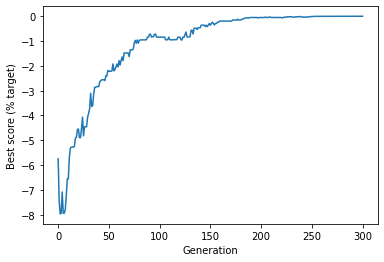

In [174]:
# main algorithm code
# set general parameters
chromosome_length = len(probs)
population_size = 10
maximum_generation = 300
best_score_progress = [] # tracks progress

# create starting population
population = create_starting_population(population_size)

# print (population)
# display best score in starting population
scores = calculate_fitness(population, probs)
best_score = np.max(scores)
print ('Starting best score, percent target: %.1f' %best_score)

# add starting best score to progress tracker
best_score_progress.append(best_score)

# going through the generations of genetic algorithm
for generation in range(maximum_generation):
    # create an empty list for new population
    new_population = []
    
    # create new popualtion generating two children at a time
    for i in range(int(population_size/2)):
        parent_1 = select_individual_by_tournament(population, scores)
        parent_2 = select_individual_by_tournament(population, scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    
    # replace the old population with the new one
    population = np.array(new_population)
    
    # apply mutation
    mutation_rate = 0.002
    population = randomly_mutate_population(population, mutation_rate)

    # score best solution, and add to tracker
    scores = calculate_fitness(population, probs)
    best_score = np.max(scores)
    best_score_progress.append(best_score)

# GA has completed required generation number
print ('End best score, percent target: %.1f' %best_score)

# plot progress
%matplotlib inline
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()